# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

Для начала импортируем библиотеки:

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import  make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

Из данных мы знаем, что данные индексируются датой и временем получения информации (признак date). 

In [2]:
df_train = pd.read_csv('/datasets/gold_recovery_train_new.csv', index_col='date')
df_test = pd.read_csv('/datasets/gold_recovery_test_new.csv', index_col='date')
df_full = pd.read_csv('/datasets/gold_recovery_full_new.csv', index_col='date')

Рассмотрим данные выборок и изучим их:

In [3]:
df_train.head(10)

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
2016-01-15 05:00:00,6.482968,10.049416,5.480257,41.633678,69.465816,10.182708,0.664118,16.999638,1.918586,115.581252,...,13.938497,-500.970168,11.883350,-500.395298,10.054147,-496.374715,7.965083,-499.364752,14.017067,-599.707915
2016-01-15 06:00:00,6.533849,10.058141,4.569100,41.995316,69.300835,10.304598,0.807342,16.723575,2.058913,117.322323,...,14.046819,-500.971133,12.091543,-500.501426,10.003247,-497.083180,8.010890,-500.002423,14.029649,-600.905470
2016-01-15 07:00:00,6.130823,9.935481,4.389813,42.452727,70.230976,10.443288,0.949346,16.689959,2.143437,124.592960,...,13.974691,-501.819696,12.101324,-500.583446,9.873169,-499.171928,7.993381,-499.794518,13.984498,-600.411070
2016-01-15 08:00:00,5.834140,10.071156,4.876389,43.404078,69.688595,10.420140,1.065453,17.201948,2.209881,131.781026,...,13.964030,-504.252450,12.060738,-501.174549,10.033838,-501.178133,7.881604,-499.729434,13.967135,-599.061188


In [4]:
df_test.head(10)

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
2016-09-01 05:59:59,168.485085,8.817007,7.420000,0.791191,1402.826803,-499.299521,1401.511119,-499.205357,1404.088107,-497.903666,...,12.029797,-499.814895,8.036586,-500.371492,8.041446,-510.037054,4.983949,-499.990990,24.978973,-500.475640
2016-09-01 06:59:59,144.133440,7.924610,7.420000,0.788838,1398.252401,-499.748672,1393.255503,-499.195380,1396.738566,-497.923683,...,12.026296,-499.473127,8.027984,-500.983079,7.907340,-507.964971,5.010224,-500.043697,25.040709,-499.501984
2016-09-01 07:59:59,133.513396,8.055252,6.988000,0.801871,1401.669677,-501.777839,1400.754446,-502.514024,1400.465244,-503.451306,...,12.040911,-501.293852,8.020490,-499.185229,8.116897,-511.927561,5.036498,-500.149615,25.032580,-503.970657
2016-09-01 08:59:59,133.735356,7.999618,6.935000,0.789329,1402.358981,-499.981597,1400.985954,-496.802968,1401.168584,-499.890350,...,11.998184,-499.481608,8.012610,-500.896783,7.974422,-521.199104,5.061599,-499.791519,25.005063,-497.613716


In [5]:
df_full.head(10)

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
2016-01-15 05:00:00,6.482968,10.049416,5.480257,41.633678,69.465816,10.182708,0.664118,16.999638,1.918586,115.581252,...,13.938497,-500.970168,11.883350,-500.395298,10.054147,-496.374715,7.965083,-499.364752,14.017067,-599.707915
2016-01-15 06:00:00,6.533849,10.058141,4.569100,41.995316,69.300835,10.304598,0.807342,16.723575,2.058913,117.322323,...,14.046819,-500.971133,12.091543,-500.501426,10.003247,-497.083180,8.010890,-500.002423,14.029649,-600.905470
2016-01-15 07:00:00,6.130823,9.935481,4.389813,42.452727,70.230976,10.443288,0.949346,16.689959,2.143437,124.592960,...,13.974691,-501.819696,12.101324,-500.583446,9.873169,-499.171928,7.993381,-499.794518,13.984498,-600.411070
2016-01-15 08:00:00,5.834140,10.071156,4.876389,43.404078,69.688595,10.420140,1.065453,17.201948,2.209881,131.781026,...,13.964030,-504.252450,12.060738,-501.174549,10.033838,-501.178133,7.881604,-499.729434,13.967135,-599.061188


In [6]:
for inf in df_train, df_test, df_full:
    print(inf.info())

<class 'pandas.core.frame.DataFrame'>
Index: 14149 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         14148 non-null  float64
 1   final.output.concentrate_pb                         14148 non-null  float64
 2   final.output.concentrate_sol                        13938 non-null  float64
 3   final.output.concentrate_au                         14149 non-null  float64
 4   final.output.recovery                               14149 non-null  float64
 5   final.output.tail_ag                                14149 non-null  float64
 6   final.output.tail_pb                                14049 non-null  float64
 7   final.output.tail_sol                               14144 non-null  float64
 8   final.output.tail_au                             

Рассмотрим размеры данных:

In [7]:
for shp in df_train, df_test, df_full:
    print(shp.shape)

(14149, 86)
(5290, 52)
(19439, 86)


Проверим дубликаты:

In [8]:
for dup in df_train, df_test, df_full:
    print(dup.duplicated().sum())

0
0
0


Изучив данные мы видим, что у нас имеются пропуски во всех таблицах. Дубликаты отсутствуют. 

Проверим, что эффективность обогащения рассчитана правильно. Вычислим её на обучающей выборке для признака rougher.output.recovery. Найдем MAE между нашими расчётами и значением признака.

Расчет эффективности происходит по формуле:
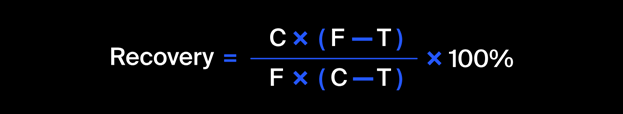
где: C — доля золота в концентрате после флотации/очистки; F — доля золота в сырье/концентрате до флотации/очистки; T — доля золота в отвальных хвостах после флотации/очистки. Найдем эти данные в таблице.

In [9]:
C = df_train['rougher.output.concentrate_au']
F = df_train['rougher.input.feed_au']
T = df_train['rougher.output.tail_au']

In [10]:
my__recovery = ((C * (F - T)) / (F * (C - T))) * 100
my__recovery

date
2016-01-15 00:00:00    87.107763
2016-01-15 01:00:00    86.843261
2016-01-15 02:00:00    86.842308
2016-01-15 03:00:00    87.226430
2016-01-15 04:00:00    86.688794
                         ...    
2018-08-18 06:59:59    89.574376
2018-08-18 07:59:59    87.724007
2018-08-18 08:59:59    88.890579
2018-08-18 09:59:59    89.858126
2018-08-18 10:59:59    89.514960
Length: 14149, dtype: float64

In [11]:
mae = mean_absolute_error(df_train['rougher.output.recovery'], my__recovery)
print('MAE =', mae)

MAE = 9.73512347450521e-15


MAE между нашими расчётами и значением признака rougher.output.recovery равна 9.73512347450521e-15, что является хорошим показателем, а следовательно, эффективность в обучающей выборке равна.

Проанализируем признаки, недоступные в тестовой выборке:

In [12]:
missed = set(df_train.columns) - set(df_test.columns)
df_train[missed].info()

<class 'pandas.core.frame.DataFrame'>
Index: 14149 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 34 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   primary_cleaner.output.concentrate_pb               14063 non-null  float64
 1   rougher.calculation.floatbank10_sulfate_to_au_feed  14148 non-null  float64
 2   rougher.calculation.au_pb_ratio                     14149 non-null  float64
 3   final.output.concentrate_ag                         14148 non-null  float64
 4   secondary_cleaner.output.tail_au                    14149 non-null  float64
 5   rougher.calculation.sulfate_to_au_concentrate       14148 non-null  float64
 6   primary_cleaner.output.tail_ag                      14148 non-null  float64
 7   secondary_cleaner.output.tail_ag                    14147 non-null  float64
 8   rougher.output.tail_sol                          

У нас пропущены 34 признака. Все они типа float64. В основном это типы параметров output — параметры продукта и calculation — расчётные характеристики. Мы знаем, что некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже. Из-за этого в тестовой выборке отсутствуют некоторые признаки.

Мы знаем, что соседние по времени параметры часто похожи. Заполним пропуски с помощью bfill.

In [13]:
df_test = df_test.fillna(method='bfill')
df_train = df_train.fillna(method='bfill')

In [14]:
df_test.isna().sum()
print(df_train.isna().sum())

final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
final.output.recovery                         0
                                             ..
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
Length: 86, dtype: int64


Вывод: Мы изучили данные, которые были предоставлены в трех выборках - исходная, обучающая и тестовая. Во всех выборках имеются пропуски. Пропуски обработали исходя из предоставленных данных о схожести параметров. Дубликаты отсутствуют. Изучили различия признаков в тестовой и обучающих выборках, где выявили 34 отсутствующих столбцов. Так же провели расчет эффективности обогощения, и благодаря МАЕ (средняя абсолютная ошибка) подтвердили корректность предоставленных данных.

## Анализ данных

Рассмотрим, как меняется концентрация металлов (Au - золото, Ag - серебро, Pb - свинец) на различных этапах очистки с помощью гистограммы. 

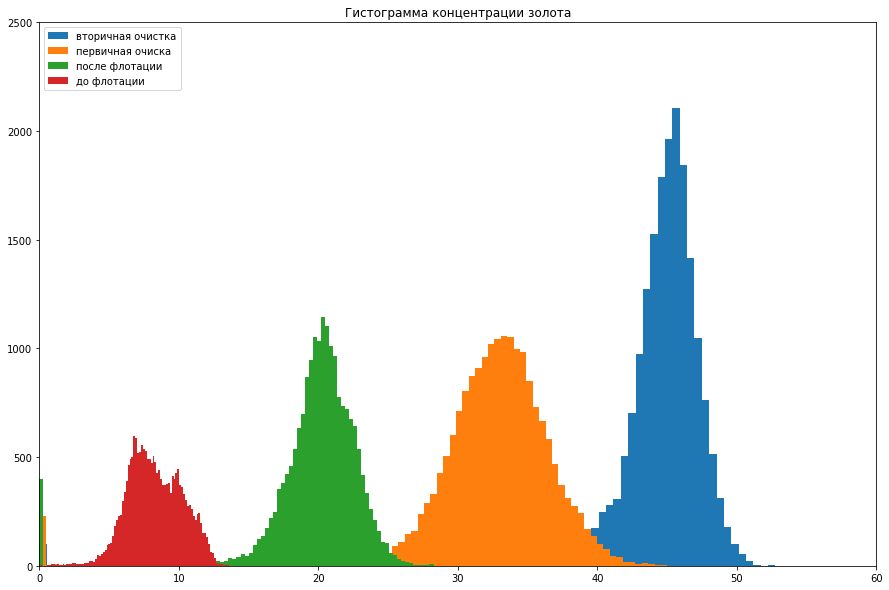

In [15]:
plt.figure(figsize=[15,10])
plt.hist(df_full['final.output.concentrate_au'], bins=100, label = 'вторичная очистка')
plt.hist(df_full['primary_cleaner.output.concentrate_au'], bins=100, label = 'первичная очиска')
plt.hist(df_full['rougher.output.concentrate_au'], bins=100, label = 'после флотации')
plt.hist(df_full['rougher.input.feed_au'], bins=100, label = 'до флотации')
plt.xlim([0, 60])
plt.ylim([0, 2500])
plt.legend(loc='upper left')
plt.title("Гистограмма концентрации золота")
plt.show()

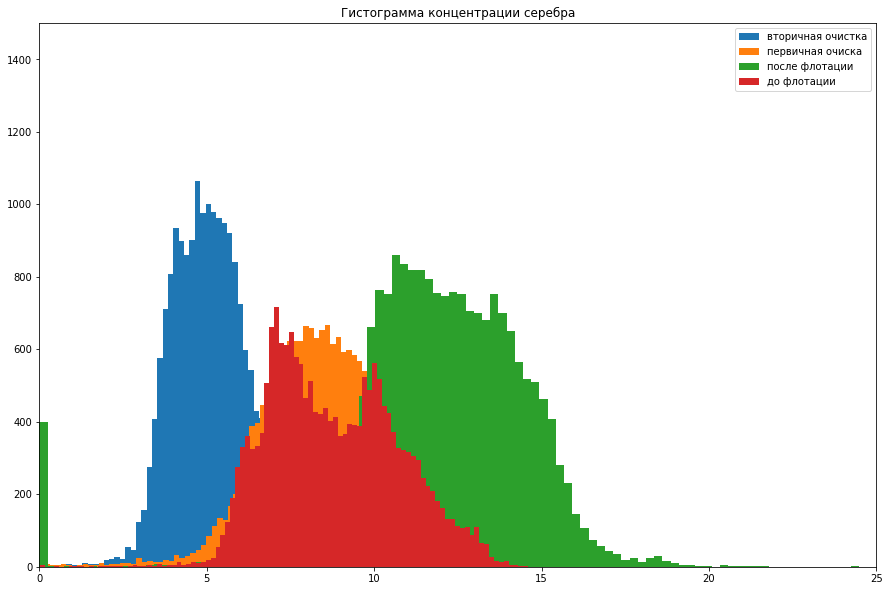

In [16]:
plt.figure(figsize=[15,10])
plt.hist(df_full['final.output.concentrate_ag'], bins=100, label = 'вторичная очистка')
plt.hist(df_full['primary_cleaner.output.concentrate_ag'], bins=100, label = 'первичная очиска')
plt.hist(df_full['rougher.output.concentrate_ag'], bins=100, label = 'после флотации')
plt.hist(df_full['rougher.input.feed_ag'], bins=100, label = 'до флотации')
plt.xlim([0, 25])
plt.ylim([0, 1500])
plt.legend(loc='upper right')
plt.title("Гистограмма концентрации серебра")
plt.show()

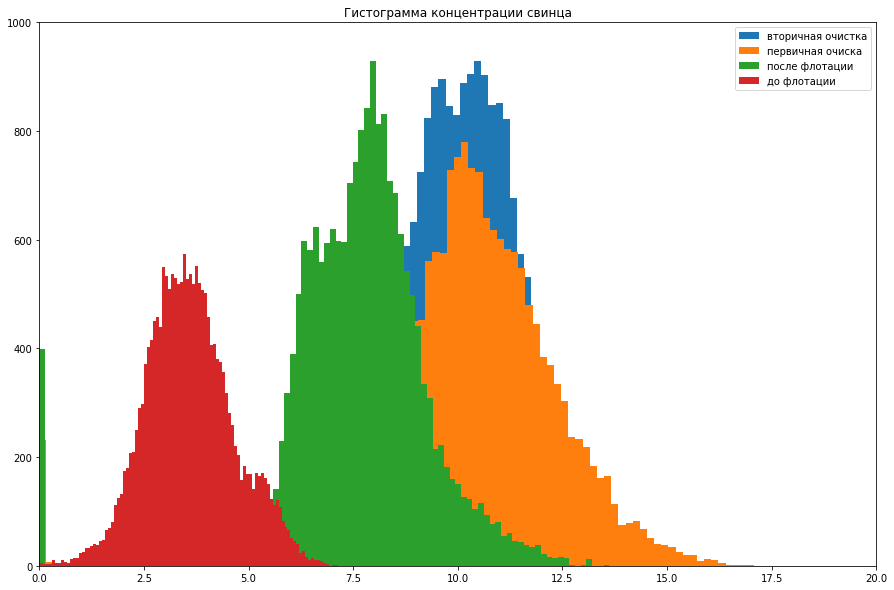

In [17]:
plt.figure(figsize=[15,10])
plt.hist(df_full['final.output.concentrate_pb'], bins=100, label = 'вторичная очистка')
plt.hist(df_full['primary_cleaner.output.concentrate_pb'], bins=100, label = 'первичная очиска')
plt.hist(df_full['rougher.output.concentrate_pb'], bins=100, label = 'после флотации')
plt.hist(df_full['rougher.input.feed_pb'], bins=100, label = 'до флотации')
plt.xlim([0, 20])
plt.ylim([0, 1000])
plt.legend(loc='upper right')
plt.title("Гистограмма концентрации свинца")
plt.show()

Вывод: Для изучения концентрация мы взяли выборку с полными данными df_full. Из графика касательно золота, мы видим что концентрация увеличивается после каждого этапа очистки. Концентрация серебра же наоброт увеличивается после флотации, но уменьшается на вторичной очистке. Концентрация свинца сначала растет, но потом остается кажется на одном уровне на этапах первичной и вторичной очистки.

Теперь сравним распределение размеров гранул сырья на обучающей и тестовой выборках так же с помощью гистограммы и выбросов:

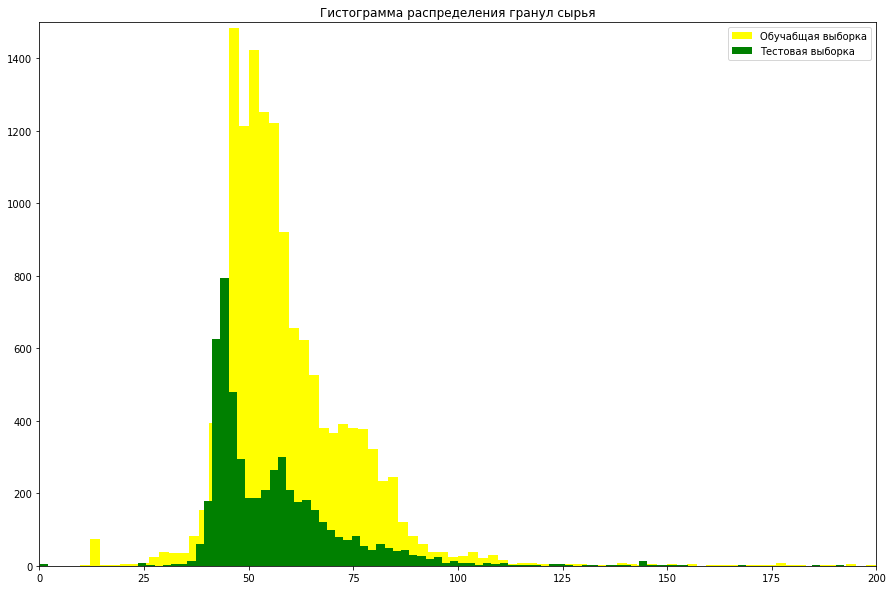

In [18]:
plt.figure(figsize=[15,10])
plt.hist(df_train['rougher.input.feed_size'], color='yellow', bins=200, label = 'Обучабщая выборка')
plt.hist(df_test['rougher.input.feed_size'], color='Green', bins=200, label = 'Тестовая выборка')
plt.xlim([0, 200])
plt.ylim([0, 1500])
plt.legend(loc='upper right')
plt.title("Гистограмма распределения гранул сырья")
plt.show()

<AxesSubplot:xlabel='rougher.input.feed_size'>

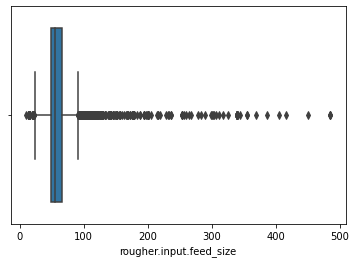

In [19]:
sns.boxplot(df_train['rougher.input.feed_size'])

<AxesSubplot:xlabel='rougher.input.feed_size', ylabel='Density'>

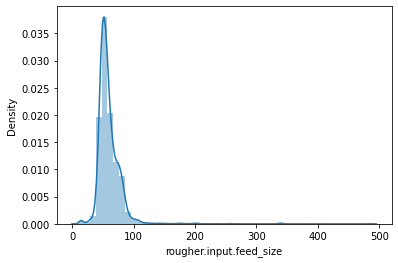

In [20]:
sns.distplot(df_train['rougher.input.feed_size'])

<AxesSubplot:xlabel='rougher.input.feed_size'>

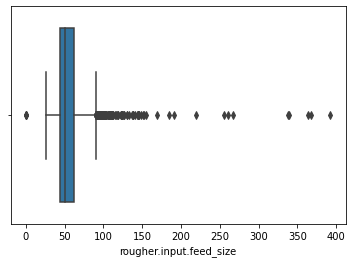

In [21]:
sns.boxplot(df_test['rougher.input.feed_size'])

<AxesSubplot:xlabel='rougher.input.feed_size', ylabel='Density'>

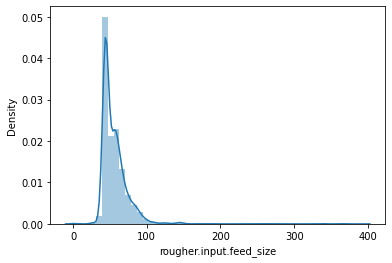

In [22]:
sns.distplot(df_test['rougher.input.feed_size'])

Из графика мы видим, что размеры гранул почти одинаков в обоих выборках. Разница в кол-ве это связано с размерами выборок. Так же график выброса указывает, что среднее значение у обоих выборок кажется идентичен в районе 50.

Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. 

Для начала подготовим данные для графика:

In [23]:
rougher_input = (df_full['rougher.input.feed_au'] + df_full['rougher.input.feed_ag'] + df_full['rougher.input.feed_pb'])
rougher_output = (df_full['rougher.output.concentrate_au'] + df_full['rougher.output.concentrate_ag'] + df_full['rougher.output.concentrate_pb'])
primary_cleaner = (df_full['primary_cleaner.output.concentrate_au'] + df_full['primary_cleaner.output.concentrate_ag'] + df_full['primary_cleaner.output.concentrate_pb'])
final_output = (df_full['final.output.concentrate_au'] + df_full['final.output.concentrate_ag'] + df_full['final.output.concentrate_pb'])

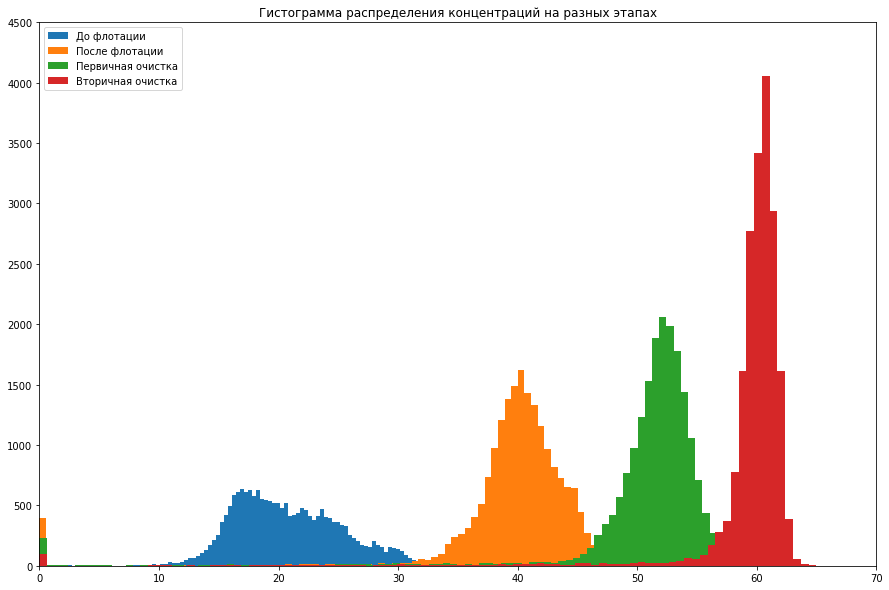

In [24]:
plt.figure(figsize=[15,10])
plt.hist(rougher_input, bins=100, label = 'До флотации')
plt.hist(rougher_output, bins=100, label = 'После флотации')
plt.hist(primary_cleaner, bins=100, label = 'Первичная очистка')
plt.hist(final_output, bins=100, label = 'Вторичная очистка')
plt.xlim([0, 70])
plt.ylim([0, 4500])
plt.legend(loc='upper left')
plt.title("Гистограмма распределения концентраций на разных этапах")
plt.show()

Концетрация с каждым этапом увеличивается.

Удаляем аномалии в обучающей и тестовой выборке. В тестовой данные только по одн

In [25]:
df_train = df_train.drop(df_train[df_train['rougher.input.feed_au'] == 0].index)
df_train = df_train.drop(df_train[df_train['rougher.output.concentrate_au'] == 0].index)
df_train = df_train.drop(df_train[df_train['primary_cleaner.output.concentrate_au'] == 0].index)
df_train = df_train.drop(df_train[df_train['final.output.concentrate_au'] == 0].index)
df_test = df_test.drop(df_test[df_test['rougher.input.feed_au'] == 0].index)

Вывод: Для изучения концентрации мы взяли выборку с полными данными df_full. Из графика касательно золота, мы видим что концентрация увеличивается после каждого этапа очистки. Концентрация серебра же наоброт увеличивается после флотации, но уменьшается на вторичной очистке. Концентрация свинца сначала растет, но потом остается кажется на одном уровне на этапах первичной и вторичной очистки. При рассмотрении суммарных данных, мы увидели что после каждого этапа происходит увеличение концетрации металлов. Так же мы рассмотрели распредение размеров гранул и благодаря графику выбросов и среднего значения удостоверились, что распределение не сильно отличаются друг от друга.

## Модель

Для начала подготовим выборки для обучения. Создадим датасет из целевых признаков, которых нет в тестовой выборке:

In [26]:
df_target = df_full[['rougher.output.recovery', 'final.output.recovery']]
df_target.head()

,rougher.output.recovery,final.output.recovery
date,,
2016-01-15 00:00:00,87.107763,70.541216
2016-01-15 01:00:00,86.843261,69.266198
2016-01-15 02:00:00,86.842308,68.116445
2016-01-15 03:00:00,87.226430,68.347543
2016-01-15 04:00:00,86.688794,66.927016


Добавим эти признаки в тестовую выборку:

In [27]:
test = df_test.merge(df_target, how = 'left', on = 'date')

Удалим из тренировочной выборки те признаки, которых нет в тестовой:

In [28]:
train = df_train.drop(set(df_train.columns)-set(test.columns), axis=1)

Напишим функцию для вычисления итоговой sMAPE(англ. Symmetric Mean Absolute Percentage Error, «симметричное среднее абсолютное процентное отклонение»).Она похожа на MAE, но выражается не в абсолютных величинах, а в относительных. А семмитричная, потому что она одинаково учитывает масштаб и целевого признака, и предсказания.
: 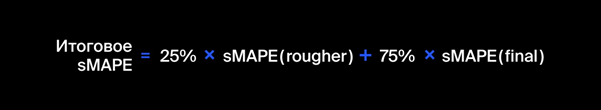

In [29]:
def smape(target, predict):
    smape = abs(target-predict)/((abs(target)+abs(predict))/2)*100
    smape = np.mean(smape)
    return smape

In [30]:
def final_smape(smape_roug, smape_final):
    return (0.25 * smape_roug + 0.75 * smape_final)

Подготовим целевые признаки в выборках и выровняем.

In [31]:
features_train_r = train.drop(['rougher.output.recovery'], axis=1)
target_train_r = train['rougher.output.recovery']
features_train_f = train.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
target_train_f = train['final.output.recovery']
features_test_r = test.drop(['rougher.output.recovery'], axis=1)
target_test_r = test['rougher.output.recovery']
features_test_f = test.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
target_test_f = test['final.output.recovery']

Рассмотрим размеры:

In [32]:
display(features_train_r.shape)
display(target_train_r.shape)
display(features_train_f.shape)
display(target_train_f.shape)
display(features_test_r.shape)
display(target_test_r.shape)
display(features_test_f.shape)
display(target_test_f.shape)

(13725, 53)

(13725,)

(13725, 52)

(13725,)

(5290, 53)

(5290,)

(5290, 52)

(5290,)

Делаем подбор параметров модели с помощью make_scorer из sklearn.metrics:

In [33]:
sm_scorer = make_scorer(smape, greater_is_better=False)

Обучим линейную регрессию и добавим матрицу гиперпараметров, а также оценим качество кросс-валидацией с помощью GridSearchCV из sklearn.model_selection:

In [34]:
model_line_reg = LinearRegression()

In [35]:
sc_line = cross_val_score(model_line_reg, features_train_r, target_train_r, scoring = sm_scorer, cv=5)
smape_r = np.mean(abs(sc_line))
print(smape_r)


5.849776131687817


In [36]:
sc_line = cross_val_score(model_line_reg, features_train_f, target_train_f, scoring = sm_scorer, cv=5)
smape_f = np.mean(abs(sc_line))
print(smape_f)

10.8898762016587


Рассчитаем SMAPe на линейной регрессии:

In [37]:
smapet = final_smape(smape_r, smape_f)
smapet


9.629851184165979

Обучим дерево решений и добавим матрицу гиперпараметров, а также оценим качество кросс-валидацией с помощью GridSearchCV из sklearn.model_selection:

In [38]:
%%time
model_tree = DecisionTreeRegressor(random_state=12345)
parameters = {'max_depth': [x for x in range(1, 10, 2)]}
tree_r = GridSearchCV(model_tree, parameters, cv=5, scoring=sm_scorer)
tree_r.fit(features_train_r, target_train_r)
print(tree_r.best_params_)
print('Smape roug', abs(tree_r.best_score_))

{'max_depth': 5}
Smape roug 6.082320567561853
CPU times: user 8.57 s, sys: 0 ns, total: 8.57 s
Wall time: 8.63 s


In [39]:
%%time
model_tree = DecisionTreeRegressor(random_state=12345)
parameters = {'max_depth': [x for x in range(1, 10, 2)]}
tree_f = GridSearchCV(model_tree, parameters, cv=5, scoring=sm_scorer)
tree_f.fit(features_train_f, target_train_f)
print(tree_f.best_params_)
print('Smape final', abs(tree_f.best_score_))

{'max_depth': 3}
Smape final 9.749918064098255
CPU times: user 7.91 s, sys: 0 ns, total: 7.91 s
Wall time: 7.92 s


Рассчитаем SMAPe на модели дерево решений:

In [40]:
tree_total_smape = final_smape(abs(tree_r.best_score_), abs(tree_f.best_score_))
tree_total_smape

8.833018689964154

Обучим модель случайного леса и добавим матрицу гиперпараметров, а также оценим качество кросс-валидацией с помощью GridSearchCV из sklearn.model_selection:

In [41]:
%%time
model_rfr = RandomForestRegressor(random_state=12345)
parameters = {'max_depth': [x for x in range(1, 10, 2)], 'n_estimators': [x for x in range (1, 20, 2)]}
model_rfr_r = GridSearchCV(model_rfr, parameters, cv=5, scoring=sm_scorer)
model_rfr_r.fit(features_train_r, target_train_r)
print(model_rfr_r.best_params_)
print('Smape roug', abs(model_rfr_r.best_score_))

{'max_depth': 7, 'n_estimators': 19}
Smape roug 5.303054465983478
CPU times: user 7min 44s, sys: 824 ms, total: 7min 45s
Wall time: 7min 46s


In [42]:
%%time
model_rfr = RandomForestRegressor(random_state=12345)
parameters = {'max_depth': [x for x in range(1, 10, 2)], 'n_estimators': [x for x in range (1, 20, 2)]}
model_rfr_f = GridSearchCV(model_rfr, parameters, cv=5, scoring=sm_scorer)
model_rfr_f.fit(features_train_f, target_train_f)
print(model_rfr_f.best_params_)
print('Smape final', abs(model_rfr_f.best_score_))

{'max_depth': 5, 'n_estimators': 19}
Smape final 9.134004121241835
CPU times: user 7min 50s, sys: 839 ms, total: 7min 51s
Wall time: 7min 52s


Рассчитаем SMAPe на модели случайный лес:

In [43]:
rfr_total_smape = final_smape(abs(model_rfr_r.best_score_), abs(model_rfr_f.best_score_))
rfr_total_smape

8.176266707427246

Так как лучший показетль был у модели случайный лес, выберем его для проверки тестовой выборки:

In [52]:
def model_rfr(features_train, target_train, features_test, depth, estimators):
    rfr_model = RandomForestRegressor(random_state=12345, max_depth=depth, n_estimators=estimators)
    rfr_model.fit(features_train, target_train)
    rfr_pred_test = rfr_model.predict(features_test)
    return rfr_pred_test

In [53]:
pred_test_roug = model_rfr(features_train_r, target_train_r, features_test_r, 7, 19)

In [54]:
pred_test_final= model_rfr(features_train_f, target_train_f, features_test_f, 5, 19)

In [55]:
test_sm = final_smape(smape(target_test_r, pred_test_roug), smape(target_test_f, pred_test_final))
test_sm

11.653362517462226

In [56]:
def model_const(features_train, target_train, features_test):
    dumpreg = DummyRegressor(strategy="mean")
    dumpreg.fit(features_train, target_train)
    predtest = dumpreg.predict(features_test)
    return predtest

In [57]:
predtest_r = model_const(features_train_r, target_train_r, features_test_r)

In [58]:
predtest_f = model_const(features_train_f, target_train_f, features_test_f)

In [60]:
smapetestconst = final_smape(smape(target_test_r, predtest_r), smape(target_test_f, predtest_f))
smapetestconst

9.831066377059802

Вывод: Мы изучили данные, проверили на дубликаты и пропуски. Проверили, что эффективность обогащения рассчитана правильно. Вычислили её на обучающей выборке для признака rougher.output.recovery. Найшли MAE между нашими расчётами и значением признака. MAE между нашими расчётами и значением признака rougher.output.recovery равна 9.73512347450521e-15, что является хорошим показателем, а следовательно, эффективность в обучающей выборке была равна. Проанализировали признаки, недоступные в тестовой выборке. У нас было пропущенно 34 признака. Все они типа float64. В основном это типы параметров output — параметры продукта и calculation — расчётные характеристики. Мы знаем, что некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже. Из-за этого в тестовой выборке отсутствуют некоторые признаки.
Мы знали, что соседние по времени параметры часто похожи. Заполнили пропуски с помощью bfill. Рассмотрели, как меняется концентрация металлов (Au - золото, Ag - серебро, Pb - свинец) на различных этапах очистки с помощью гистограммы. Для изучения концентрации мы взяли выборку с полными данными df_full. Из графика касательно золота, мы увидели что концентрация увеличивается после каждого этапа очистки. Концентрация серебра же наоброт увеличивается после флотации, но уменьшается на вторичной очистке. Концентрация свинца сначала растет, но потом остается кажется на одном уровне на этапах первичной и вторичной очистки.
Исследовали суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. При рассмотрении суммарных данных, мы увидели что после каждого этапа происходит увеличение концетрации металлов. Так же мы рассмотрели распредение размеров гранул и благодаря графику выбросов и среднего значения удостоверились, что распределение не сильно отличаются друг от друга. Для обучение моделей сначала подготовили выборки. Создали датасет из целевых признаков, которых нет в тестовой выборке. Добавили эти признаки в тестовую выборку. Удалили из тренировочной выборки те признаки, которых нет в тестовой. Написали функцию для вычисления итоговой sMAPE(англ. Symmetric Mean Absolute Percentage Error, «симметричное среднее абсолютное процентное отклонение»). Подготовили целевые признаки в выборках и выровняли. Для обучения взяли три модели -  линейную регрессию, дерево решений и случайные лес и добавили матрицу гиперпараметров для подбора, а также оценили качество кросс-валидацией с помощью GridSearchCV из sklearn.model_selection. Рассчитали SMAPe на каждой модели. Так как лучший показетль был у модели случайный лес, выбрали его для проверки тестовой выборки. DummyRegressor подтвердил адекватность модели.